In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

data = pd.read_csv("Breast Cancer data.csv")

In [2]:
data = data.drop(columns=['id', 'Unnamed: 32'])
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})


In [3]:
X = data.drop(columns=['diagnosis'])   
y = data['diagnosis'] 


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
linear_svm = SVC(kernel='linear', C=1.0, random_state=42)
linear_svm.fit(X_train, y_train)

rbf_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
rbf_svm.fit(X_train, y_train)

SVC(random_state=42)

In [7]:
y_pred_linear = linear_svm.predict(X_test)
y_pred_rbf = rbf_svm.predict(X_test)

In [8]:
print("Linear Kernel SVM Performance:")
print(classification_report(y_test, y_pred_linear))
print("Accuracy:", accuracy_score(y_test, y_pred_linear))

Linear Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.9766081871345029


In [9]:
print("\nRBF Kernel SVM Performance:")
print(classification_report(y_test, y_pred_rbf))
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))



RBF Kernel SVM Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       108
           1       0.97      0.97      0.97        63

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.9766081871345029


In [10]:
cm_linear = confusion_matrix(y_test, y_pred_linear)
print("Confusion Matrix - Linear Kernel:\n", cm_linear)

cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print("Confusion Matrix - RBF Kernel:\n", cm_rbf)

Confusion Matrix - Linear Kernel:
 [[106   2]
 [  2  61]]
Confusion Matrix - RBF Kernel:
 [[106   2]
 [  2  61]]


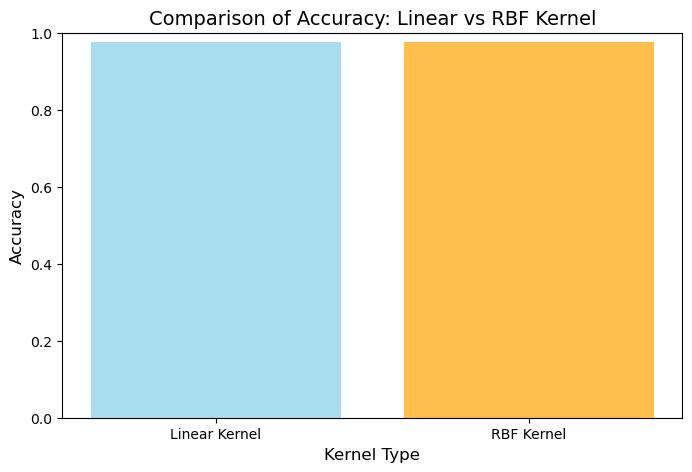

In [11]:


accuracy_linear = accuracy_score(y_test, y_pred_linear)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)

accuracies = [accuracy_linear, accuracy_rbf]
kernels = ['Linear Kernel', 'RBF Kernel']

plt.figure(figsize=(8, 5))
plt.bar(kernels, accuracies, color=['skyblue', 'orange'], alpha=0.7)
plt.ylim(0, 1)
plt.title('Comparison of Accuracy: Linear vs RBF Kernel', fontsize=14)
plt.xlabel('Kernel Type', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.show()


In [12]:
train_acc_linear = accuracy_score(y_train, linear_svm.predict(X_train))
train_acc_rbf = accuracy_score(y_train, rbf_svm.predict(X_train))

test_acc_linear = accuracy_score(y_test, y_pred_linear)
test_acc_rbf = accuracy_score(y_test, y_pred_rbf)

print("Linear Kernel Training Accuracy:", train_acc_linear)
print("Linear Kernel Test Accuracy:", test_acc_linear)
print("RBF Kernel Training Accuracy:", train_acc_rbf)
print("RBF Kernel Test Accuracy:", test_acc_rbf)


Linear Kernel Training Accuracy: 0.9899497487437185
Linear Kernel Test Accuracy: 0.9766081871345029
RBF Kernel Training Accuracy: 0.9874371859296482
RBF Kernel Test Accuracy: 0.9766081871345029


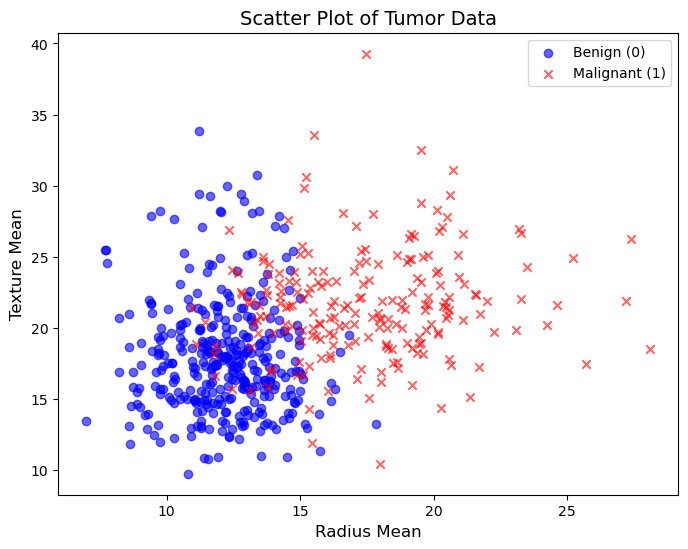

In [13]:
plt.figure(figsize=(8, 6))

plt.scatter(data['radius_mean'][data['diagnosis'] == 0], 
            data['texture_mean'][data['diagnosis'] == 0], 
            label='Benign (0)', marker='o', color='blue', alpha=0.6)

plt.scatter(data['radius_mean'][data['diagnosis'] == 1], 
            data['texture_mean'][data['diagnosis'] == 1], 
            label='Malignant (1)', marker='x', color='red', alpha=0.6)

plt.title('Scatter Plot of Tumor Data', fontsize=14)
plt.xlabel('Radius Mean', fontsize=12)
plt.ylabel('Texture Mean', fontsize=12)
plt.legend()

plt.show()

